### Codio Activity 13.1: Binary Classification with Regression

**Expected Time = 60 minutes** 

**Total Points = 45**

This activity motivates the later work with logistic regression.  To begin, you will build a linear regression model to solve a binary classification problem.  In order to use the model, you will have to determine a threshold for the single input feature.  Using this model you will determine its accuracy on a test set.   

#### Index 

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import seaborn as sns

### The Data

We begin with a dataset similar to that from the videos, containing body information on three different kinds of penguins in Antarctica.  The task is to differentiate between these classes using the body measurements, sex, and location data. 

In [2]:
penguins = sns.load_dataset('penguins').dropna()

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Text(0.5, 1.0, '')

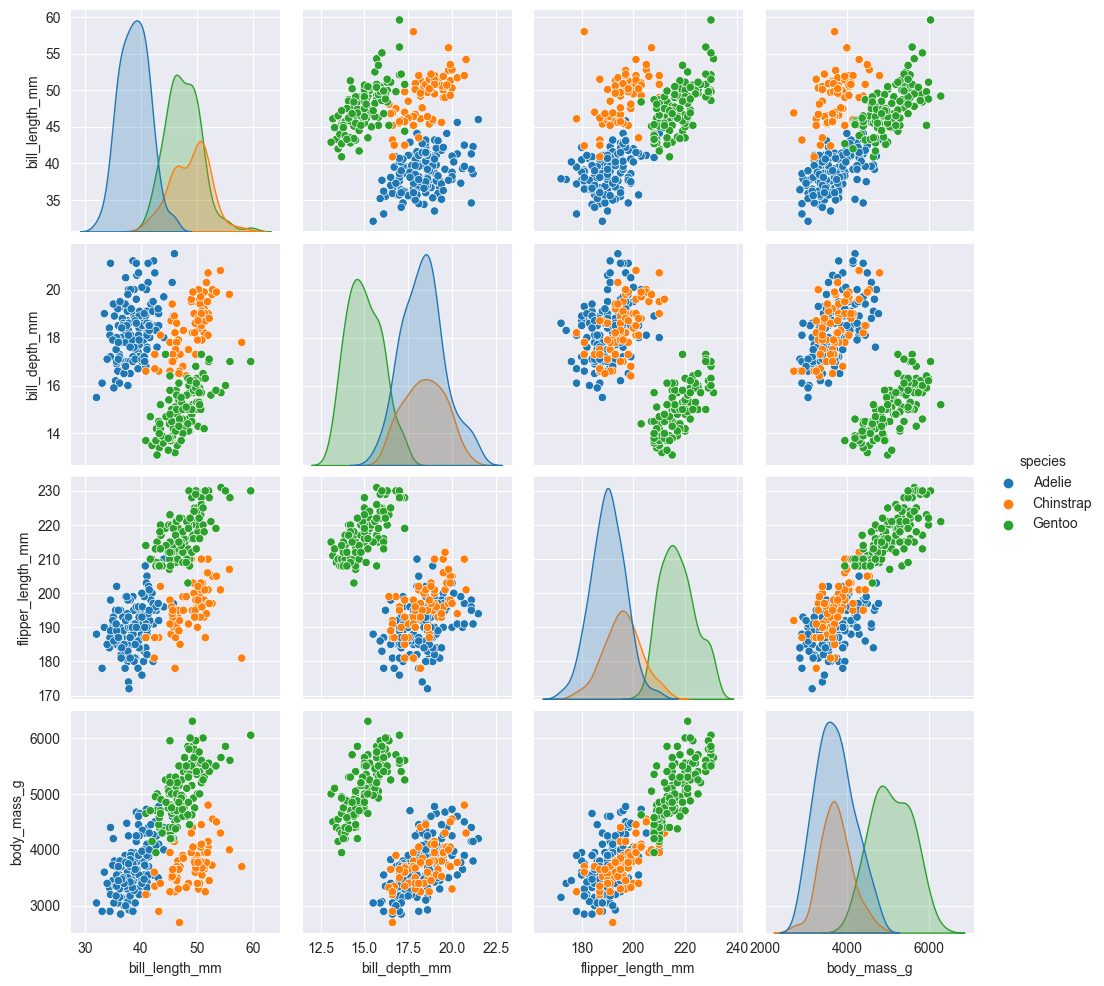

In [4]:
sns.pairplot(penguins, hue = 'species');
plt.title('')

[Back to top](#-Index)

### Problem 1

#### Binarizing the Problem

**5 Points**

To begin, subset the data to only `Adelie` and `Gentoo` penguins.  Assign your DataFrame to `binary_penguins` below.  

In [5]:
### GRADED

binary_penguins = ''

### BEGIN SOLUTION
binary_penguins = penguins.loc[penguins.species.isin(['Adelie', 'Gentoo'])]
### END SOLUTION

# Answer check
binary_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
### BEGIN HIDDEN TESTS
binary_penguins_ = penguins.loc[penguins.species.isin(['Adelie', 'Gentoo'])]
#
#
#
pd.testing.assert_frame_equal(binary_penguins, binary_penguins_)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Building a Regression Model

**10 Points**

<center>
    <img src = 'images/lr.png'/>
</center>


For starters, build a linear regression model that uses `flipper_length_mm` as `X` and a numeric representation of the `species` column with `Adelie` = 0 and `Gentoo` = 1.  

Assign the input to `X` as a DataFrame, the binary numeric values as a pandas series `y`, and name the fit model `lr_flipper`. 

HINT: to create the binary numeric values for y, use `.map()`

In [15]:
### GRADED

X = ''
y = ''
lr_flipper = ''

### BEGIN SOLUTION
X = binary_penguins[['flipper_length_mm']]
y = binary_penguins['species'].map({'Adelie': 0, 'Gentoo': 1})
lr_flipper = LinearRegression().fit(X, y)
### END SOLUTION

# Answer check
print(lr_flipper)

LinearRegression()


In [16]:
### BEGIN HIDDEN TESTS
X_ = binary_penguins_[['flipper_length_mm']]
y_ = binary_penguins_['species'].map({'Adelie': 0, 'Gentoo': 1})
lr_flipper_ = LinearRegression().fit(X_, y_)
#
#
#
np.testing.assert_array_equal(lr_flipper.coef_, lr_flipper_.coef_)
np.testing.assert_array_equal(lr_flipper.intercept_, lr_flipper_.intercept_)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Coeficients and Threshold

**10 Points**

<center>
    <img src = 'images/thresh.png'/>
</center>

The idea here is to use .5 as a threshold for classification.  If 

$$P(Gentoo) = \beta_0 + \beta_1*X $$

This means the threshold would be determined by 

$$\text{threshold} =  \frac{0.5 - \beta_0 }{\beta_1}$$

Determine this value using the learned coefficients from your `lr_flipper` model to determine this value.  Assign it as a float to `threshold` below.

In [18]:
### GRADED

threshold = ''

### BEGIN SOLUTION
threshold = float((0.5 - lr_flipper.intercept_)/lr_flipper.coef_)
### END SOLUTION

# Answer check
print(threshold)

203.99219348283097


In [19]:
### BEGIN HIDDEN TESTS
threshold_ = float((0.5 - lr_flipper.intercept_)/lr_flipper.coef_)
#
#
#
assert threshold == threshold_, 'Use the .intercept_ and .coef_ attributes exactly'
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### Making predictions with the model

**10 Points**

To make predictions, you want to take a flipper length, apply the linear model, and if the threshold is greater than or equal to the threshold predict 1, otherwise predict 0.  Below, complete the function `linear_preds` to make these predictions. 

In [22]:
### GRADED

def linear_preds(X, threshold, model):
    """Creates predictions using a model based on >= threshold on 
    array X.
    
    Arguments
    ---------
    X: Input Array (N, 1)
    y: threshold
       float for which threshold >= 0.5 will predict 1
    model: scikitlearn model with .coef_ and .intercept_
    
    Returns
    -------
    numpy.array of 0 and 1 based on prediction threshold
    """
    return None

### BEGIN SOLUTION
def linear_preds(X, threshold, model):
    pred = model.coef_*X + model.intercept_
    return np.where(pred >= 0.5, 1, 0)
### END SOLUTION

# Answer check
preds = linear_preds(X, 0.5, lr_flipper)
print(preds[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [23]:
### BEGIN HIDDEN TESTS
def linear_preds_(X, threshold, model):
    pred = model.coef_*X + model.intercept_
    return np.where(pred >= 0.5, 1, 0)
preds_ = linear_preds(X, 0.5, lr_flipper)
#
#
np.testing.assert_array_equal(preds, preds_)
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 5

#### Evaluating the accuracy of the model

**10 Points**

Use the predictions to determine the accuracy of your linear model.  Assign your value as a float to `linear_acc` below. 

In [24]:
### GRADED

linear_acc = ''

### BEGIN SOLUTION
linear_acc = sum(preds.ravel() == y)/len(y)
### END SOLUTION

# Answer check
print(linear_acc)

0.9849056603773585


In [25]:
### BEGIN HIDDEN TESTS
linear_acc_ = sum(preds.ravel() == y)/len(y)
#
#
#
assert linear_acc == linear_acc_
### END HIDDEN TESTS